In [31]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [32]:
import os

print(os.listdir('./gdrive/MyDrive/SHIFT_SUMMER/'))

['train.csv', 'starting_k', '.csv', 'submission.csv', 'Команды.xlsx']


In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
import os

print(os.listdir('./gdrive/MyDrive/SHIFT_SUMMER/'))

['train.csv', 'starting_k', '.csv', 'submission.csv', 'Команды.xlsx']


In [35]:
import catboost

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.8 MB/s eta 0:00:00


In [37]:
df = pd.read_csv('./gdrive/MyDrive/SHIFT_SUMMER/train.csv', index_col=0)
df

,full_sq,floor,build_year,num_room,kitch_sq,state,product_type,raion_popul,indust_part,sport_objects_raion,...,cafe_count_1000_price_high,cafe_sum_1500_min_price_avg,green_part_2000,cafe_sum_2000_min_price_avg,mosque_count_3000,prom_part_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,year,price_doc
0,43,24.0,2014.0,1.0,10.0,1.0,1,8.294300,0.007122,0,...,0,6.907755,3.710396,6.725430,0,1.803359,6.616560,0,2014,5533460
1,66,3.0,1979.0,3.0,10.0,3.0,0,11.314231,0.232205,4,...,0,6.626122,2.764431,6.479615,1,2.631169,6.469948,1,2013,9900000
2,55,5.0,1979.0,2.0,6.0,2.0,0,11.718817,0.000170,5,...,0,6.368753,3.511844,6.192138,0,1.363537,6.462171,0,2012,1990000
3,45,7.0,1970.0,2.0,6.0,2.0,0,11.331032,0.428826,4,...,0,6.753601,1.814825,6.551080,0,2.732418,6.458229,0,2014,6500000
4,43,4.0,1968.0,2.0,6.0,2.0,0,11.538769,0.136330,6,...,0,6.636603,2.257588,6.646507,1,2.020222,6.634778,2,2014,8500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21324,56,19.0,1979.0,2.0,1.0,1.0,1,11.655744,0.049637,6,...,0,6.492240,2.711378,6.816188,0,3.297317,6.536155,0,2014,10159562
21325,42,5.0,1977.0,1.0,8.0,3.0,0,11.718817,0.000170,5,...,0,6.502295,3.802208,6.291569,0,1.442202,6.487684,0,2014,5100000
21326,32,3.0,1979.0,2.0,6.0,2.0,0,11.719940,0.000000,4,...,0,6.572814,3.062456,6.583520,1,2.733718,6.573904,2,2011,4800000
21327,43,4.0,1969.0,2.0,5.0,2.0,0,11.331032,0.428826,4,...,0,6.586172,2.408745,6.563982,0,3.034953,6.476311,0,2013,6300000


In [41]:
df.shape

(21329, 51)

In [36]:
print(df.shape)
df.info()

year
2014    0.446763
2013    0.263538
2012    0.159689
2015    0.105584
2011    0.024427
Name: proportion, dtype: float64
(21329, 51)
<class 'pandas.core.frame.DataFrame'>
Index: 21329 entries, 0 to 21328
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_sq                      21329 non-null  int64  
 1   floor                        21329 non-null  float64
 2   build_year                   21329 non-null  float64
 3   num_room                     21329 non-null  float64
 4   kitch_sq                     21329 non-null  float64
 5   state                        21329 non-null  float64
 6   product_type                 21329 non-null  int64  
 7   raion_popul                  21329 non-null  float64
 8   indust_part                  21329 non-null  float64
 9   sport_objects_raion          21329 non-null  int64  
 10  shopping_centers_raion       21329 non-null  int64  
 11  ra

<Axes: >

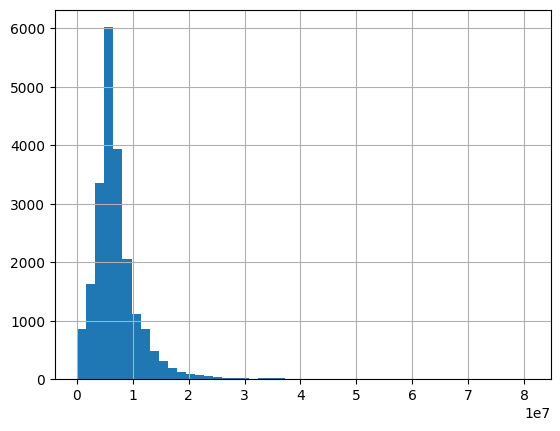

In [43]:
target_name = 'price_doc'

df[target_name].hist(bins=50)

<Axes: >

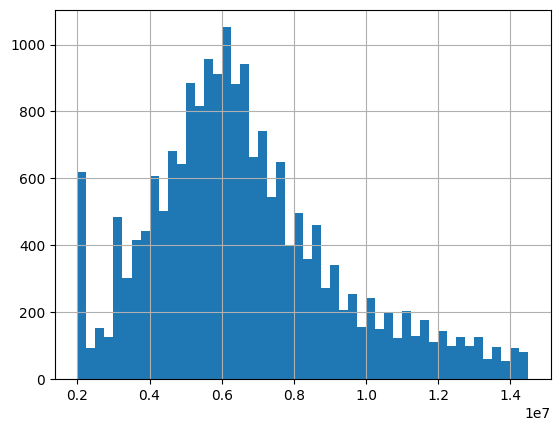

In [42]:
df[
    (df[target_name] <= df[target_name].quantile(0.95))
    & (df[target_name] >= df[target_name].quantile(0.05))
][target_name].hist(bins=50)

In [48]:
  # Все столбцы кроме последнего
X = df.iloc[:, :-1]
y = df.iloc[:, -1]   # Только последний столбец

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стадартизация признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")

Средняя абсолютная ошибка (MAE): 2074825.38
Среднеквадратичная ошибка (MSE): 14201718283174.32
Корень из среднеквадратичной ошибки (RMSE): 3768516.72
Коэффициент детерминации (R^2): 0.40


In [49]:
y_pred.mean()

7074725.869432037

In [50]:
X = df.iloc[:, :-1]  # Все столбцы кроме последнего
y = df.iloc[:, -1]   # Только последний столбец

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стадартизация признаков
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")

Средняя абсолютная ошибка (MAE): 2074825.38
Среднеквадратичная ошибка (MSE): 14201718283174.31
Корень из среднеквадратичной ошибки (RMSE): 3768516.72
Коэффициент детерминации (R^2): 0.40


In [51]:
submission = pd.read_csv('./gdrive/MyDrive/SHIFT_SUMMER/starting_k/submission.csv', index_col=0)

In [52]:
submission

,price_doc
0,7.135718e+06
1,7.135718e+06
2,7.135718e+06
3,7.135718e+06
4,7.135718e+06
...,...
9137,7.135718e+06
9138,7.135718e+06
9139,7.135718e+06
9140,7.135718e+06


In [30]:

test_df = pd.read_csv('./gdrive/MyDrive/SHIFT_SUMMER/starting_k/test.csv', index_col=0)

test_preds = model.predict(test_df[X.columns])
submission['price_doc'] = test_preds
print(len(test_preds))
print(submission.shape)
submission.to_csv('./gdrive/MyDrive/SHIFT_SUMMER/submission.csv')

9142
(9142, 1)
